<a href="https://colab.research.google.com/github/rutujas11/codephine1/blob/main/Titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/codephine/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/codephine/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/codephine/gender_submission.csv')

In [ ]:
print(train_data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(test_data.head(5))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [ ]:
print(gender_submission.head(5))

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [ ]:
full_data = pd.concat([train_data, test_data], ignore_index=True)

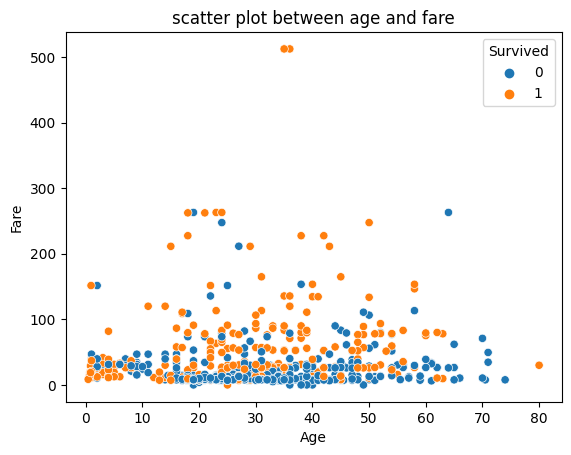

In [ ]:
sns.scatterplot(x='Age',y='Fare', hue='Survived',data=train_data)
plt.title('scatter plot between age and fare')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

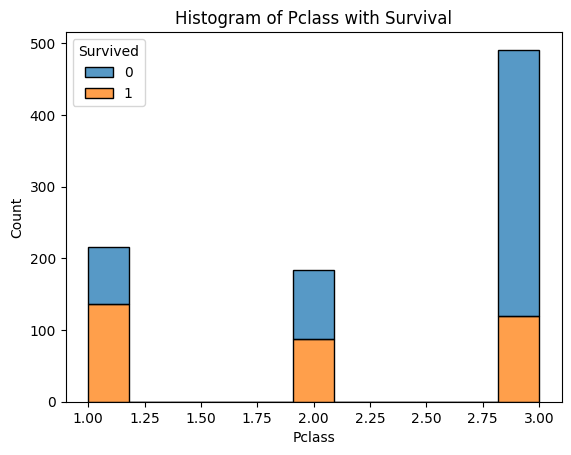

In [ ]:
sns.histplot(x='Pclass',hue='Survived',data=train_data, multiple='stack')
plt.title('Histogram of Pclass with Survival')
plt.show

In [ ]:
def preprocess_data(data):
  data['Age'].fillna(data['Age'].median(), inplace=True)
  data['Fare'].fillna(data['Fare'].median(), inplace=True)
  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
  label_encoder = LabelEncoder()
  data['Sex'] = label_encoder.fit_transform(data['Sex'])
  data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
  data['Title'] = data['Title'].replace(['Lady','Countess','Dona'],'Royalty')
  data['Title'] = data['Title'].replace(['Capt','Col','Don','Major','Rev','Sir','Jonkheer'], 'Mr')
  data['Title'] = data['Title'].replace(['Mlle','Ms'],'Miss')
  data['Title'] = data['Title'].replace('Mme','Mrs')
  data['Title'] = label_encoder.fit_transform(data['Title'])

  return data

In [ ]:
full_data = preprocess_data(full_data)

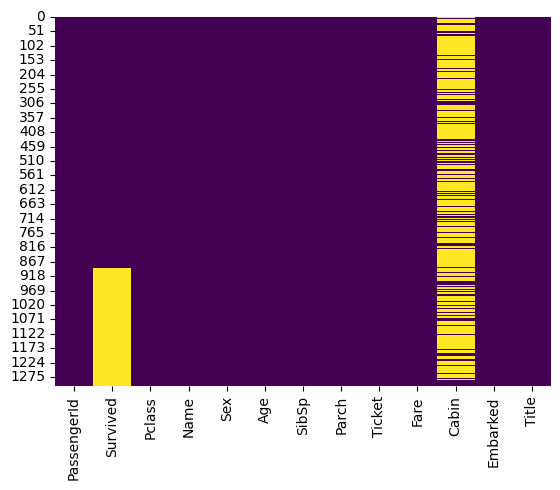

In [ ]:
sns.heatmap(full_data.isnull(), cbar=False, cmap= 'viridis')
plt.show()

In [ ]:
full_data.fillna(full_data.mean(),  inplace=True)

for col in full_data.select_dtypes(include= 'object').columns:
  full_data[col].fillna(full_data[col].mode()[0],inplace=True)

<ipython-input-52-2972b4de667a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_data.fillna(full_data.mean(),  inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

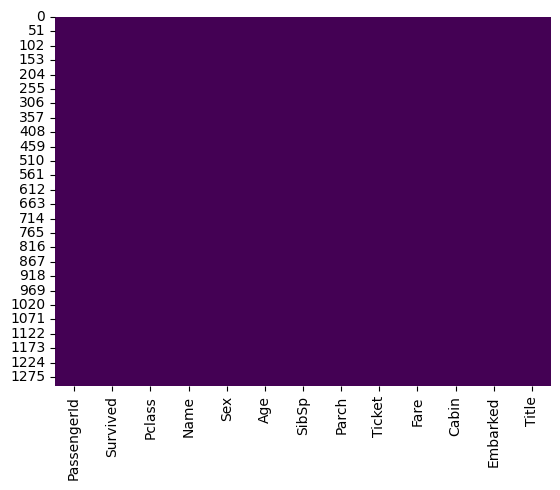

In [ ]:
sns.heatmap(full_data.isnull(), cbar=False, cmap='viridis')
plt.show

In [ ]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

In [ ]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']
X = train_data[features]
y = train_data['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on the validation set:{accuracy:.2f}")

Accuracy on the validation set:0.80


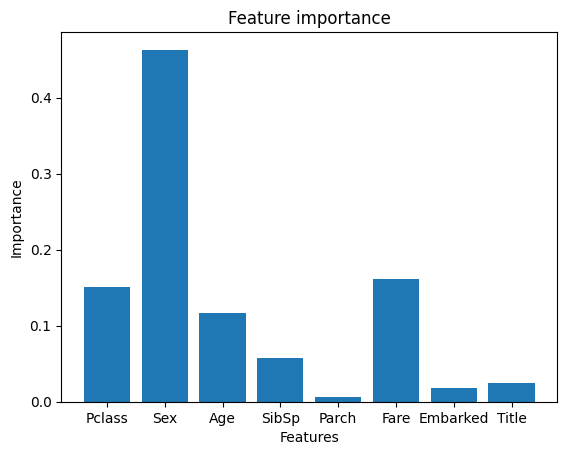

In [ ]:
feature_importance = model.feature_importances_
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importance')
plt.show()

In [ ]:
test_predictions = model.predict(test_data[features])

In [ ]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})

In [ ]:
submission.to_csv('titanic_submission.csv', index=False)

In [ ]:
submission = pd.read_csv('titanic_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
